In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import constants
%matplotlib inline

Defining the Variables

In [328]:
# Parametersfor the benchmarking
fps=100.0
num_particles=1000
dt=1.0/fps
spatial_resolution=1E-6  # in metres per px
dust_diameter=7.14E-6 # in metres
dust_rho=1510.0
mu = 0
mass = 4.0 / 3.0 * np.pi * ( dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
# print(mass)
kb=constants.Boltzmann
T=1000 #temperature in Kelvin
sigma = np.sqrt(kb*T/mass)
print(sigma)

left=0
right=1751 # right border in px as per the camera of expt
up=1667 # up border in px as per the camera of expt
down=0
left_SI=left*spatial_resolution
right_SI=right*spatial_resolution
up_SI=up*spatial_resolution
down_SI=down*spatial_resolution
final_frame=100
n_bins=18

0.00021903148058823087


Generating initial x coordinates

In [329]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x=unif_x.rvs(num_particles)
# print(sample_x)
# fig, ax = plt.subplots()
# ax.hist(sample_v,100) # plot histogram
# ax.set_xlabel('x')
# ax.set_ylabel('measurements')
# print(sample_x_trunc)
# print(sample_x)
sample_x_in_resol= sample_x/spatial_resolution
# print(sample_x_in_resol[:10])
sample_x_rough= sample_x_in_resol.astype('int64')
# print(sample_x_trunc[:10])
sample_x_rough_prev_SI=sample_x_rough.astype('float64')*spatial_resolution

print(sample_x_rough_prev_SI)
# print(sample_x_SI)

[1.565e-03 1.197e-03 1.257e-03 7.850e-04 4.610e-04 9.200e-04 2.310e-04
 5.700e-04 7.520e-04 9.250e-04 2.700e-05 1.397e-03 9.620e-04 1.653e-03
 3.290e-04 7.020e-04 1.113e-03 5.480e-04 9.390e-04 1.485e-03 1.583e-03
 6.880e-04 8.030e-04 7.170e-04 3.410e-04 1.448e-03 1.288e-03 1.090e-04
 4.960e-04 1.096e-03 4.910e-04 8.660e-04 9.570e-04 1.733e-03 6.250e-04
 5.130e-04 4.060e-04 1.692e-03 9.140e-04 1.647e-03 1.119e-03 1.600e-04
 1.182e-03 1.020e-03 1.557e-03 9.250e-04 1.713e-03 3.800e-05 1.041e-03
 4.590e-04 2.680e-04 4.940e-04 2.140e-04 8.900e-04 1.480e-04 1.464e-03
 1.330e-04 4.640e-04 7.880e-04 5.730e-04 1.707e-03 1.165e-03 5.680e-04
 8.210e-04 4.680e-04 1.580e-04 4.020e-04 7.140e-04 1.069e-03 1.507e-03
 3.480e-04 1.328e-03 7.760e-04 1.106e-03 7.120e-04 5.060e-04 4.000e-05
 3.730e-04 7.830e-04 3.080e-04 1.163e-03 7.250e-04 1.023e-03 3.800e-04
 5.070e-04 9.110e-04 1.284e-03 1.060e-03 1.133e-03 1.383e-03 3.200e-05
 8.590e-04 1.264e-03 3.680e-04 4.470e-04 6.130e-04 2.680e-04 1.437e-03
 5.400

In [330]:
part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
# part_no

Generating velocities

Text(0, 0.5, 'measurements')

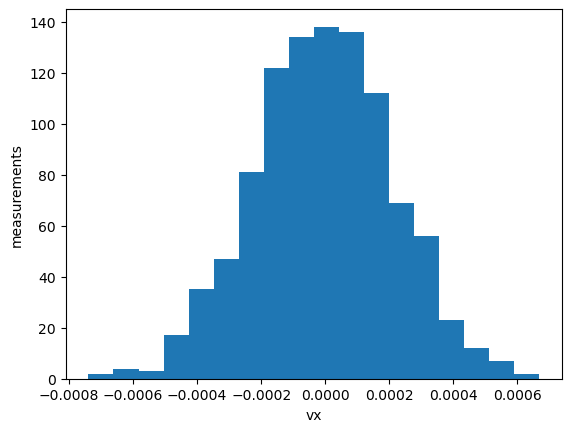

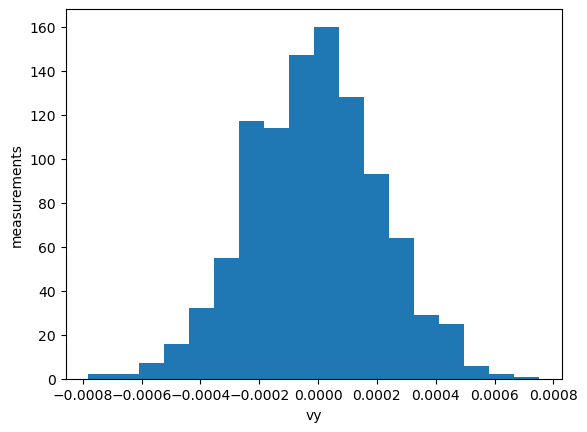

In [331]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
sample_vy= norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vx, n_bins) # plot histogram
ax.set_xlabel('vx')
ax.set_ylabel('measurements')
fig, ax = plt.subplots()
ax.hist(sample_vy, n_bins) # plot histogram
ax.set_xlabel('vy')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating cordinates in next frame

Text(0, 0.5, 'measurements')

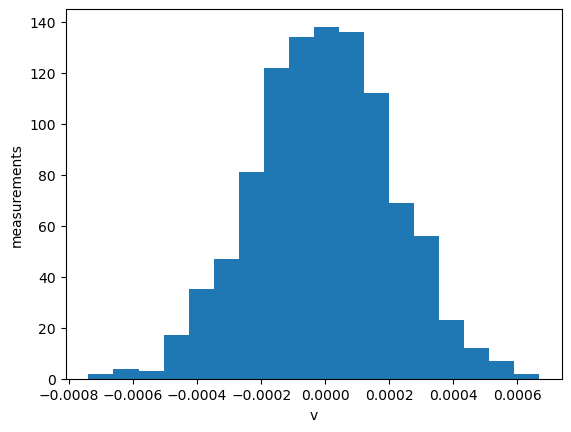

In [332]:
# Simulating the motion of the particles
x_forward=sample_x + sample_vx*dt
x_forward_in_resol=x_forward/spatial_resolution
# print(x_forward_in_resol[:10])
x_forward_trunc=x_forward_in_resol.astype('int64')   
#print(x_forward_trunc)
# print(x_forward_trunc[:10])
x_forward_rough_SI=x_forward_trunc.astype('float64')*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vx, n_bins) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating the discrepancies

[ 0.0002  0.      0.0001  0.      0.      0.     -0.0002 -0.0002  0.0001
  0.0003]
[ 1.93736168e-04  8.34718474e-05  1.17395571e-04 -3.66983040e-05
 -4.24744340e-06 -1.31684551e-05 -2.35807637e-04 -2.03988032e-04
  1.06854779e-04  2.37398077e-04]
3.222510881211646e-05
0.4061475559007931
40.614755590079305


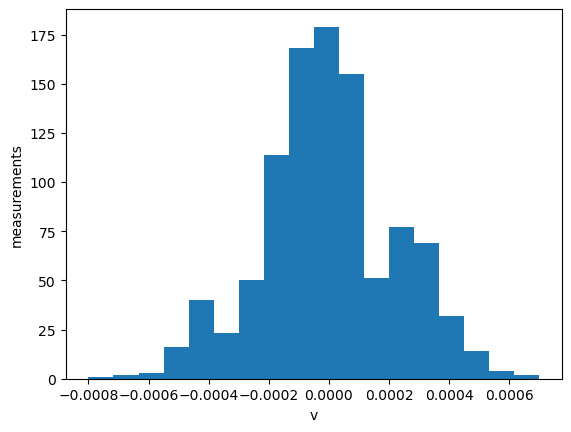

In [333]:
# Calculating restored velocities
v_restored=(x_forward_rough_SI - sample_x_rough_prev_SI)/dt
print(v_restored[:10])
print(sample_vx[:10])   
fig, ax = plt.subplots()
ax.hist(v_restored, n_bins) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')

# print(sample_vx[:10])

# Calculating the discrepancy between the original and restored velocities
discrepancy=np.abs(sample_vx-v_restored)
print(np.mean(discrepancy))
frac_discrepancy=np.abs(discrepancy/sample_vx)
print(np.mean(frac_discrepancy))
percent_discrepancy=frac_discrepancy*100
print(np.mean(percent_discrepancy))

Code to simulate motion in y

In [334]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the y coordinates of the particles
unif_y = sts.uniform(down_SI, up_SI-down_SI)
sample_y=unif_y.rvs(num_particles)
sample_y_in_resol= sample_y/spatial_resolution
sample_y_rough= sample_y_in_resol.astype('int64')
sample_y_rough_prev_SI=sample_y_rough.astype('float64')*spatial_resolution

Text(0, 0.5, 'measurements')

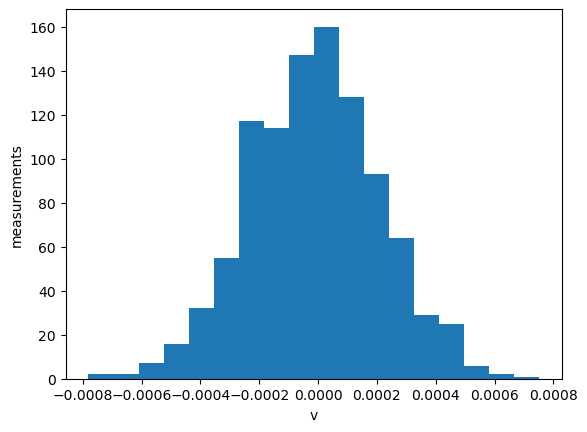

In [335]:
# Simulating the motion of the particles
y_forward=sample_y_rough_prev_SI+sample_vy*dt
y_forward_in_resol=y_forward/spatial_resolution
y_forward_rough=y_forward_in_resol.astype('int64')
# print(x_forward_trunc)
y_forward_rough_SI=y_forward_rough.astype('float64')*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vy, n_bins) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Making the database of co-ordinates for two frames

In [336]:
def make_velocities(fps,num_particles,spatial_resolution, mu,T, right_border_px, up_border_px,final_frame):
    dt=1.0/fps
    init_frame=1
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    sigma = np.sqrt(kb*T/mass)
    # print(sigma)
    left=0
    down=0
    down_SI=down*spatial_resolution
    left_SI=left*spatial_resolution
    up_SI=up_border_px*spatial_resolution
    right_SI=right_border_px*spatial_resolution
    frame_full_df=pd.DataFrame()
    while init_frame<=final_frame:
        if init_frame==1:
            # Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
            unif_x = sts.uniform(left_SI, right_SI-left_SI)
            sample_x=unif_x.rvs(num_particles)
            sample_x_in_resol= sample_x/spatial_resolution
            sample_x_trunc= sample_x_in_resol.astype('int64')
            sample_x_trunc_SI=sample_x_trunc.astype('float64')*spatial_resolution
            
            unif_y = sts.uniform(down_SI, up_SI-down_SI)
            sample_y=unif_y.rvs(num_particles)
            sample_y_in_resol= sample_y/spatial_resolution
            sample_y_trunc= sample_y_in_resol.astype('int64')
            sample_y_trunc_SI=sample_y_trunc.astype('float64')*spatial_resolution

            part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
            # Generate a sample of 1000 random velocities from a normal distribution
            norm_rv = sts.norm(mu, sigma)
            sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
            sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
            
        # Simulating the motion of the particles for x coordinates
        x_forward = sample_x_trunc_SI + sample_vx*dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype('int64')
        x_forward_SI = x_forward_trunc.astype('float64') * spatial_resolution
        # Simulating the motion of the particles for y coordinates
        y_forward = sample_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype('int64')
        y_forward_SI=y_forward_trunc.astype('float64')*spatial_resolution

        # Calculating restored velocities
        v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
        v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt
        # Append the data for the current frame
        frame_data={'part_no':part_no, 'x': sample_x_trunc_SI, 'y':sample_y_trunc_SI, 'frame': init_frame,'vx (restored)': v_restored_x, 'vy (restored)': v_restored_y, 'vx': sample_vx, 'vy': sample_vy}
        frame_df=pd.DataFrame(frame_data)
        frame_full_df = pd.concat([frame_full_df, frame_df], ignore_index=True)
        sample_x_trunc_SI=x_forward_SI
        sample_y_trunc_SI= y_forward_SI
        init_frame+=1
    return frame_full_df

In [337]:
# Print the DataFrame for each frame
x_y_df = make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up, final_frame)
x_y_df


,part_no,x,y,frame,vx (restored),vy (restored),vx,vy
0,0,0.000075,0.001305,1,-0.0001,-0.0001,-0.000048,-0.000006
1,1,0.000901,0.001446,1,-0.0003,-0.0001,-0.000225,-0.000004
2,2,0.001541,0.001444,1,0.0001,0.0002,0.000169,0.000249
3,3,0.001456,0.000156,1,0.0001,-0.0002,0.000141,-0.000195
4,4,0.000431,0.000819,1,0.0003,0.0000,0.000346,0.000029
...,...,...,...,...,...,...,...,...
99995,995,0.001228,0.000517,100,0.0001,-0.0001,0.000121,-0.000004
99996,996,0.001276,0.000611,100,-0.0003,0.0001,-0.000213,0.000160
99997,997,0.000378,0.000929,100,0.0002,0.0004,0.000213,0.000489
99998,998,0.000246,0.001292,100,0.0002,-0.0002,0.000270,-0.000159


<BarContainer object of 18 artists>

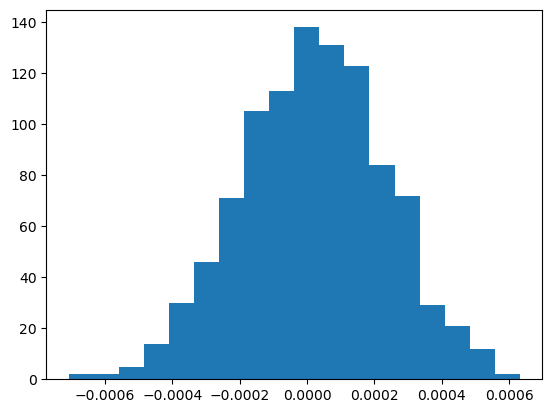

In [338]:
counts_act, bins_act = np.histogram(x_y_df['vx'], bins = n_bins)
fig_act, ax_act = plt.subplots()
arr_bins_centers = 0.5 * (bins_act[1:] + bins_act[:-1])
ax_act.bar(arr_bins_centers, counts_act/(final_frame), width = (arr_bins_centers[1] - arr_bins_centers[0]))

<BarContainer object of 18 artists>

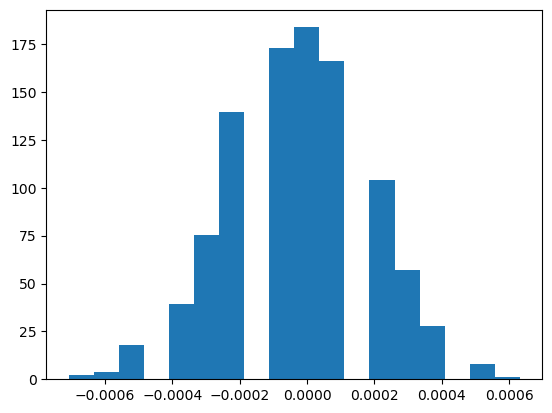

In [339]:
fig, ax = plt.subplots()
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_res_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_res_centers, counts_res/(final_frame), width = (arr_bins_centers[1] - arr_bins_centers[0]))

<BarContainer object of 18 artists>

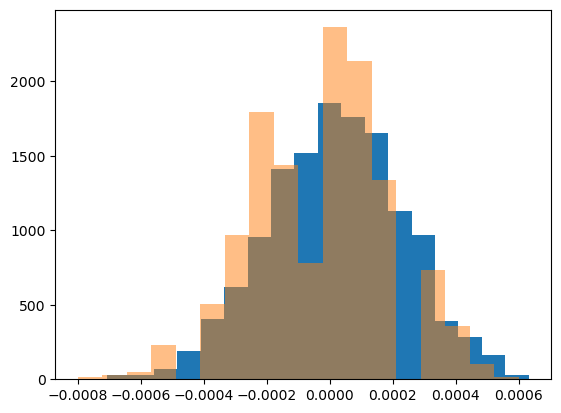

In [340]:
counts, bins = np.histogram(x_y_df['vx'], bins = n_bins, density = True)
fig, ax = plt.subplots()
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])
ax.bar(arr_bins_centers, counts, width = (arr_bins_centers[1] - arr_bins_centers[0]))
# print(sample_v)
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = n_bins, density = True)
arr_bins_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_centers, counts_res, width = (arr_bins_centers[1] - arr_bins_centers[0]),alpha=0.5)

In [341]:
vx_restored=x_y_df['vx (restored)']
sample_vx=x_y_df['vx']
print(np.std(vx_restored))
print(np.std(sample_vx))
print(mass*np.std(sample_vx)**2/constants.Boltzmann)
print(mass*np.std(x_y_df['vx (restored)'])**2/constants.Boltzmann)

0.0002121360179483405
0.00021402458248621225
954.804020957986
938.0278806977173


Function to get the discrepancies

In [342]:
def get_percent_discrepancies(v_restored,v_actual):
    discrepancy = np.abs(v_actual - v_restored)
    # print(np.mean(discrepancy))
    frac_discrepancy = np.abs(discrepancy / v_actual)
    # print(np.mean(frac_discrepancy))
    percent_discrepancy = frac_discrepancy*100
    # print(np.mean(percent_discrepancy))
    return np.mean(percent_discrepancy)

In [343]:
get_percent_discrepancies(vx_restored,sample_vx)

1621.2066045253202

<BarContainer object of 18 artists>

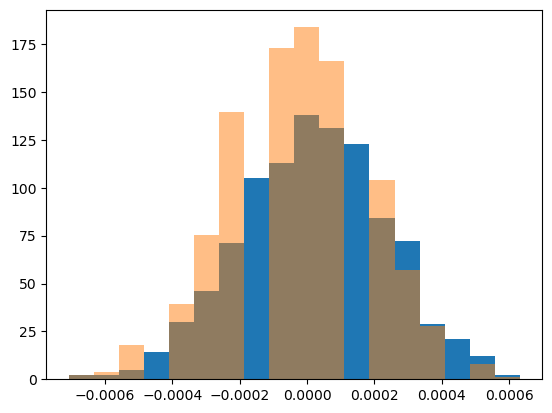

In [344]:
df=make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up,3)
counts, bins = np.histogram(sample_vx, bins = n_bins)
fig, ax = plt.subplots()
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])
ax.bar(arr_bins_centers, counts/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]))
# print(sample_v)
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_centers, counts_res/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]),alpha=0.5)

In [345]:
spatial_resolution_arr=np.arange(1E-9,1E-6,1E-8)
print(spatial_resolution_arr)
print(len(spatial_resolution_arr))


[1.00e-09 1.10e-08 2.10e-08 3.10e-08 4.10e-08 5.10e-08 6.10e-08 7.10e-08
 8.10e-08 9.10e-08 1.01e-07 1.11e-07 1.21e-07 1.31e-07 1.41e-07 1.51e-07
 1.61e-07 1.71e-07 1.81e-07 1.91e-07 2.01e-07 2.11e-07 2.21e-07 2.31e-07
 2.41e-07 2.51e-07 2.61e-07 2.71e-07 2.81e-07 2.91e-07 3.01e-07 3.11e-07
 3.21e-07 3.31e-07 3.41e-07 3.51e-07 3.61e-07 3.71e-07 3.81e-07 3.91e-07
 4.01e-07 4.11e-07 4.21e-07 4.31e-07 4.41e-07 4.51e-07 4.61e-07 4.71e-07
 4.81e-07 4.91e-07 5.01e-07 5.11e-07 5.21e-07 5.31e-07 5.41e-07 5.51e-07
 5.61e-07 5.71e-07 5.81e-07 5.91e-07 6.01e-07 6.11e-07 6.21e-07 6.31e-07
 6.41e-07 6.51e-07 6.61e-07 6.71e-07 6.81e-07 6.91e-07 7.01e-07 7.11e-07
 7.21e-07 7.31e-07 7.41e-07 7.51e-07 7.61e-07 7.71e-07 7.81e-07 7.91e-07
 8.01e-07 8.11e-07 8.21e-07 8.31e-07 8.41e-07 8.51e-07 8.61e-07 8.71e-07
 8.81e-07 8.91e-07 9.01e-07 9.11e-07 9.21e-07 9.31e-07 9.41e-07 9.51e-07
 9.61e-07 9.71e-07 9.81e-07 9.91e-07]
100


In [346]:
discrepancy_arr=[]
T_discrepancy_arr=[]
for i in range(len(spatial_resolution_arr)):
    spatial_resolution_loop=spatial_resolution_arr[i]
    df=make_velocities(fps,num_particles,spatial_resolution_loop, mu,T, right, up,2)
    discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
    discrepancy_arr.append(discrepancy)
    T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)

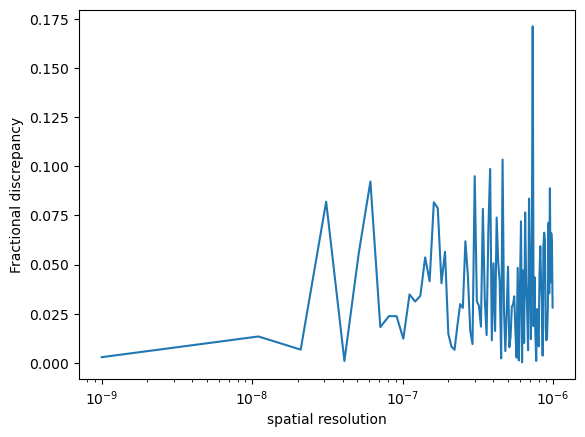

In [347]:
fig, ax = plt.subplots()
ax.plot(spatial_resolution_arr, T_discrepancy_arr)
ax.set_xlabel('spatial resolution')
ax.set_ylabel('Fractional discrepancy')
ax.set_xscale('log')

In [348]:
fps_arr=np.arange(1E1,1E4,1E2)
print(fps_arr)
print(len(fps_arr))

[  10.  110.  210.  310.  410.  510.  610.  710.  810.  910. 1010. 1110.
 1210. 1310. 1410. 1510. 1610. 1710. 1810. 1910. 2010. 2110. 2210. 2310.
 2410. 2510. 2610. 2710. 2810. 2910. 3010. 3110. 3210. 3310. 3410. 3510.
 3610. 3710. 3810. 3910. 4010. 4110. 4210. 4310. 4410. 4510. 4610. 4710.
 4810. 4910. 5010. 5110. 5210. 5310. 5410. 5510. 5610. 5710. 5810. 5910.
 6010. 6110. 6210. 6310. 6410. 6510. 6610. 6710. 6810. 6910. 7010. 7110.
 7210. 7310. 7410. 7510. 7610. 7710. 7810. 7910. 8010. 8110. 8210. 8310.
 8410. 8510. 8610. 8710. 8810. 8910. 9010. 9110. 9210. 9310. 9410. 9510.
 9610. 9710. 9810. 9910.]
100


In [349]:
discrepancy_arr=[]
T_discrepancy_arr=[]
for i in range(len(fps_arr)):
    fps_loop=fps_arr[i]
    df=make_velocities(fps_loop,num_particles,spatial_resolution, mu,T, right, up,2)
    discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
    discrepancy_arr.append(discrepancy)
    T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)

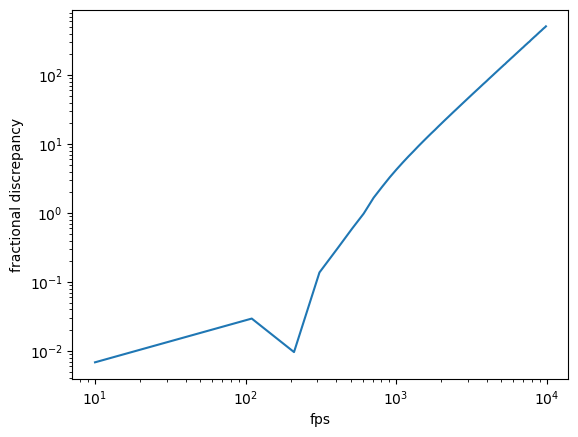

In [350]:
fig, ax = plt.subplots()
ax.plot(fps_arr, T_discrepancy_arr)
ax.set_xlabel('fps')
ax.set_ylabel('fractional discrepancy')
ax.set_xscale('log')
ax.set_yscale('log')

Rough work (trying something out)

In [351]:
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x_trial=unif_x.rvs(num_particles)
unif_y = sts.uniform(down_SI, up_SI-down_SI)
sample_y_trial=unif_y.rvs(num_particles)

norm_rv = sts.norm(mu, sigma)
sample_vx_trial = norm_rv.rvs(num_particles) #generate a sample of certain size
sample_vy_trial= norm_rv.rvs(num_particles) 



In [352]:
def make_velocities_trial(fps,num_particles,spatial_resolution, final_frame, x_init, y_init, vx_init, vy_init):
    dt=1.0/fps
    init_frame=1
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    # print(sigma)
    frame_full_df=pd.DataFrame()
    sample_x=x_init
    sample_y=y_init
    sample_vx=vx_init
    sample_vy=vy_init
    while init_frame<=final_frame:
        if init_frame==1:
            sample_x_in_resol= sample_x/spatial_resolution
            sample_x_trunc= sample_x_in_resol.astype('int64')
            sample_x_trunc_SI=sample_x_trunc.astype('float64')*spatial_resolution

            sample_y_in_resol= sample_y/spatial_resolution
            sample_y_trunc= sample_y_in_resol.astype('int64')
            sample_y_trunc_SI=sample_y_trunc.astype('float64')*spatial_resolution

            part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
                
        # Simulating the motion of the particles for x coordinates
        x_forward = sample_x_trunc_SI + sample_vx*dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype('int64')
        x_forward_SI = x_forward_trunc.astype('float64') * spatial_resolution
        # Simulating the motion of the particles for y coordinates
        y_forward = sample_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype('int64')
        y_forward_SI=y_forward_trunc.astype('float64')*spatial_resolution

        # Calculating restored velocities
        v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
        v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt
        # Append the data for the current frame
        frame_data={'part_no':part_no, 'x': sample_x_trunc_SI, 'y':sample_y_trunc_SI, 'frame': init_frame,'vx (restored)': v_restored_x, 'vy (restored)': v_restored_y, 'vx': sample_vx, 'vy': sample_vy}
        frame_df=pd.DataFrame(frame_data)
        frame_full_df = pd.concat([frame_full_df, frame_df], ignore_index=True)
        sample_x_trunc_SI=x_forward_SI
        sample_y_trunc_SI= y_forward_SI
        init_frame+=1
    return frame_full_df

In [353]:
trial=make_velocities_trial(fps,num_particles,spatial_resolution, 2, sample_x_trial, sample_y_trial, sample_vx_trial, sample_vy_trial)
trial

,part_no,x,y,frame,vx (restored),vy (restored),vx,vy
0,0,0.000476,0.000734,1,0.0002,0.0004,0.000244,0.000449
1,1,0.000129,0.001154,1,-0.0002,0.0002,-0.000137,0.000243
2,2,0.000580,0.001324,1,-0.0001,0.0001,-0.000065,0.000134
3,3,0.000817,0.000634,1,0.0003,-0.0001,0.000323,-0.000100
4,4,0.000345,0.000682,1,-0.0004,0.0000,-0.000352,0.000100
...,...,...,...,...,...,...,...,...
1995,995,0.001285,0.001535,2,-0.0003,0.0002,-0.000211,0.000219
1996,996,0.001186,0.000524,2,0.0001,0.0002,0.000101,0.000286
1997,997,0.001546,0.000106,2,-0.0002,-0.0004,-0.000189,-0.000334
1998,998,0.000960,0.001094,2,-0.0002,-0.0006,-0.000197,-0.000536


In [354]:
fps_arr=np.arange(1E1,1E4,1E2)
print(fps_arr)
print(len(fps_arr))


[  10.  110.  210.  310.  410.  510.  610.  710.  810.  910. 1010. 1110.
 1210. 1310. 1410. 1510. 1610. 1710. 1810. 1910. 2010. 2110. 2210. 2310.
 2410. 2510. 2610. 2710. 2810. 2910. 3010. 3110. 3210. 3310. 3410. 3510.
 3610. 3710. 3810. 3910. 4010. 4110. 4210. 4310. 4410. 4510. 4610. 4710.
 4810. 4910. 5010. 5110. 5210. 5310. 5410. 5510. 5610. 5710. 5810. 5910.
 6010. 6110. 6210. 6310. 6410. 6510. 6610. 6710. 6810. 6910. 7010. 7110.
 7210. 7310. 7410. 7510. 7610. 7710. 7810. 7910. 8010. 8110. 8210. 8310.
 8410. 8510. 8610. 8710. 8810. 8910. 9010. 9110. 9210. 9310. 9410. 9510.
 9610. 9710. 9810. 9910.]
100


In [355]:
discrepancy_arr=[]
T_discrepancy_arr=[]
for i in range(len(fps_arr)):
    fps_loop=fps_arr[i]
    df=make_velocities_trial(fps_loop,num_particles,spatial_resolution,2, sample_x_trial, sample_y_trial, sample_vx_trial, sample_vy_trial)
    discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
    discrepancy_arr.append(discrepancy)
    T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)

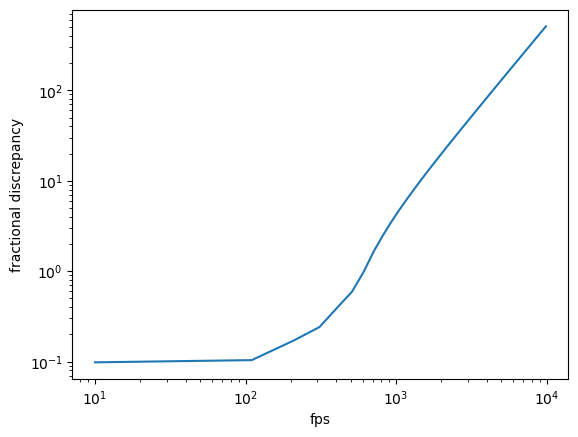

In [356]:
fig, ax = plt.subplots()
ax.plot(fps_arr, T_discrepancy_arr)
ax.set_xlabel('fps')
ax.set_ylabel('fractional discrepancy')
ax.set_xscale('log')
ax.set_yscale('log')

In [371]:
spatial_resolution_arr=np.logspace(-10,-6,1000)
print(spatial_resolution_arr)
print(len(spatial_resolution_arr))

[1.00000000e-10 1.00926219e-10 1.01861017e-10 1.02804473e-10
 1.03756668e-10 1.04717682e-10 1.05687597e-10 1.06666496e-10
 1.07654461e-10 1.08651577e-10 1.09657929e-10 1.10673602e-10
 1.11698682e-10 1.12733256e-10 1.13777413e-10 1.14831241e-10
 1.15894830e-10 1.16968270e-10 1.18051653e-10 1.19145070e-10
 1.20248614e-10 1.21362380e-10 1.22486461e-10 1.23620954e-10
 1.24765955e-10 1.25921561e-10 1.27087871e-10 1.28264983e-10
 1.29452998e-10 1.30652016e-10 1.31862140e-10 1.33083472e-10
 1.34316117e-10 1.35560179e-10 1.36815763e-10 1.38082977e-10
 1.39361927e-10 1.40652724e-10 1.41955477e-10 1.43270295e-10
 1.44597292e-10 1.45936580e-10 1.47288272e-10 1.48652484e-10
 1.50029332e-10 1.51418933e-10 1.52821404e-10 1.54236865e-10
 1.55665436e-10 1.57107239e-10 1.58562396e-10 1.60031031e-10
 1.61513269e-10 1.63009236e-10 1.64519059e-10 1.66042866e-10
 1.67580786e-10 1.69132952e-10 1.70699493e-10 1.72280545e-10
 1.73876240e-10 1.75486715e-10 1.77112106e-10 1.78752553e-10
 1.80408193e-10 1.820791

In [372]:
discrepancy_arr=[]
T_discrepancy_arr=[]
for i in range(len(spatial_resolution_arr)):
    spatial_resolution_loop=spatial_resolution_arr[i]
    df=make_velocities_trial(1000,num_particles,spatial_resolution_loop,2, sample_x_trial, sample_y_trial, sample_vx_trial, sample_vy_trial)
    discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
    discrepancy_arr.append(discrepancy)
    T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)

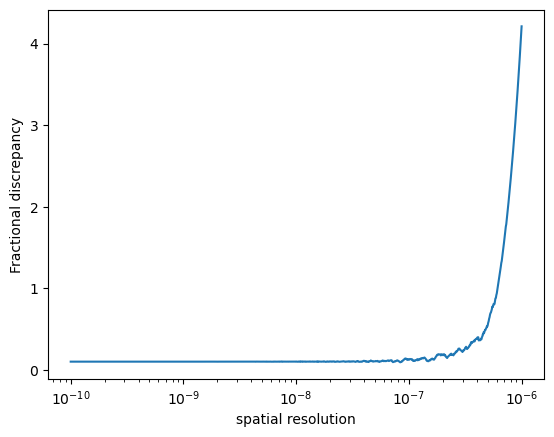

In [373]:
fig, ax = plt.subplots()
ax.plot(spatial_resolution_arr, T_discrepancy_arr)
ax.set_xlabel('spatial resolution')
ax.set_ylabel('Fractional discrepancy')
ax.set_xscale('log')